In [9]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
from celluloid import Camera #Ver momentos
import scipy as sp
from scipy import integrate
import os.path as path
import wget 

# Punto 2

Habiendo definido la serie de Fourier analíticamente, se procede a animar en varios valores para n, la serie obtenida es 



$f(t) = 2 \sum\frac{(-1)^{n-1}}{n}sin(nt)$ 

Para ello se define la función y se grafica para diversos valores de n 

In [10]:
#Se define la función que va dentro de la sumatoria en la serie de Fourier 
def f2(t, n):
    return 2 * (((-1)**(n-1))/n) * np.sin(n*t/L)

<IPython.core.display.Javascript object>


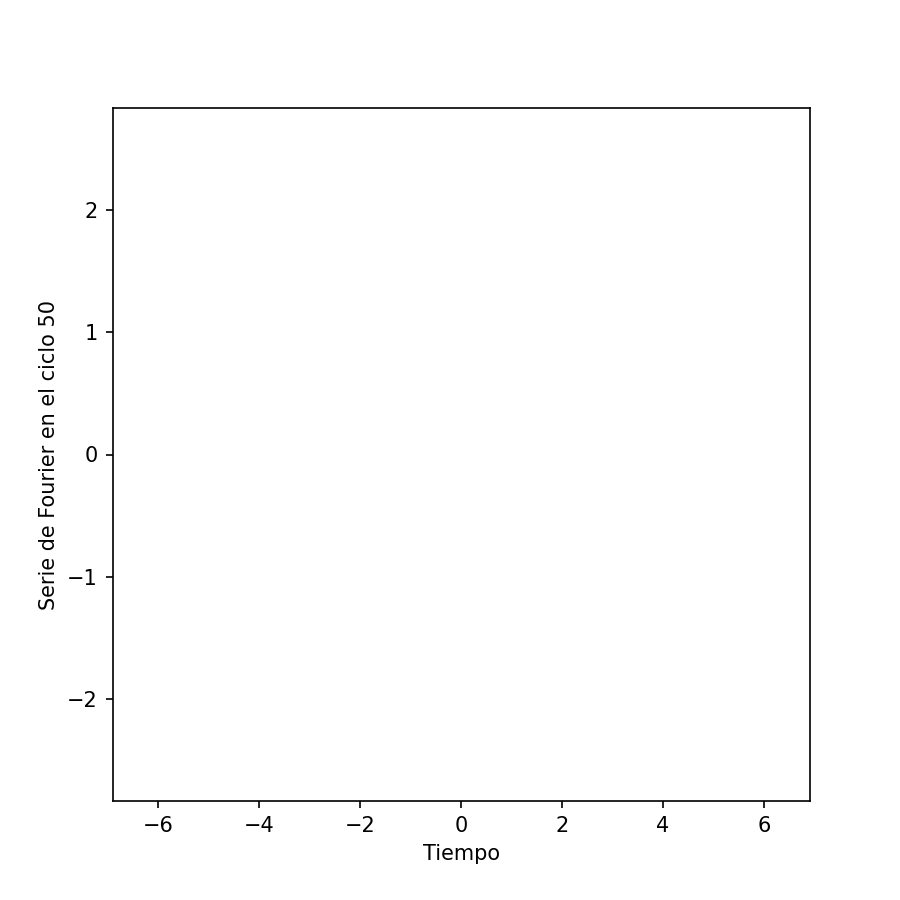

In [11]:
fig2 = plt.figure(figsize=(6,6))
camera = Camera(fig2)

L = np.pi #En qué puntos la función se "corta"
cicles = 2 #Se graficarán 50 ciclos para obtener los 50 armónicos 
x = np.linspace(-np.pi*cicles,np.pi*cicles)

n = 1
nt = 50 #Se toman los 50 armónicos 
F = 0

while n <= nt:
    F += f2(x,n)
    plt.plot(x,F,c='k')
    plt.xlabel("Tiempo")
    plt.ylabel("Serie de Fourier en el ciclo {}". format(n))
    camera.snap()
    n += 1 
    
animation = camera.animate()  

# Punto 3

Punto 1.3, inciso 2. Usando la integral y la identidad de Parseval pensar en un programa para estimar numéricamente la funcion zeta 6 de Riemann

Como resultado se obtuvo que 

$\sum_{n=1}^{\infty} \frac{1}{n^{6}} = \frac{1}{\pi} \int_{-\pi}^{\pi} \left(\frac{1}{12} \left(t^{3} - t \pi^{2}\right) \right)^{2} dt$

In [4]:
#Entonces se define la función encontrada en la integral
def f3(t):
    return (1/np.pi)*((1/12)*(t**3 - np.pi**2 * t))**2

In [5]:
#Se define la integral de Riemann para la función 3. 
def integralRiemann(t):
    integral, error = integrate.quad( lambda t: f3(t), -np.pi , np.pi )
    return (integral, error)

In [6]:
#Ahora se hace la implementación de la integral. 
x3 = np.linspace(-np.pi, np.pi, 100)
zetaseis, errorz6 = integralRiemann(x3)
teorico3 = (np.pi**6)/945
dif3 = (np.abs(teorico3 - zetaseis) / teorico3)*100
print("Una aproximación numérica para zeta(6) = {:.10f} que presenta un error del {:.2f}%".format(zetaseis, dif3)) #Revisar

Una aproximación numérica para zeta(6) = 1.0173430620 que presenta un error del 0.00%


# Punto 4

In [7]:
#Primero definimos la función dada en el problema
def f4(x):
    f = np.exp(-0.1*x)*np.sin(x)
    return f

In [12]:
#Discretización de los datos 
N4 = 100
dx4_= 100/(4*np.pi)

x4_ = np.arange(-2*np.pi, 2*np.pi, 1/dx4_)

In [13]:
def derivada_exacta(x):
    return np.exp(-0.1*x)*(-0.1*np.sin(x) +  np.cos(x))

der_exacta = derivada_exacta(x4_)

In [14]:
def derivada_derecha(f, x):
    dx = 1e-6
    der_der = (f(x+dx) - f(x))/dx
    return der_der

der_der = derivada_derecha(f4, x4_)

Ahora, hemos de recordar que la derivada espectral se basa en el principio 


$f´(t) = F^{-1}(i$ $\omega$ $F[f(t)])$

Para lo que se procede a hallar la transformada de Fourier de la función 

In [15]:
#Transformada de Fourier 

#Discretización de las frecuencias 

freq4_ = (2*np.pi/(4*np.pi))*np.arange(-N4/2, N4/2) #Esto es un 2pi/T, T es el periodo que se definió para la función
freq4_ = np.fft.fftshift(freq4_) #Aqui la idea es reordenar las frecuencias 

#Coeficientes Ak para la transfromada de Fourier
X4 = np.fft.fft(f4(x4_)) #Manera en qué cambian los datos, valores complejos 

#Ahora se aplica la formula
der_fft = np.fft.ifft(1j*X4*freq4_)

<IPython.core.display.Javascript object>


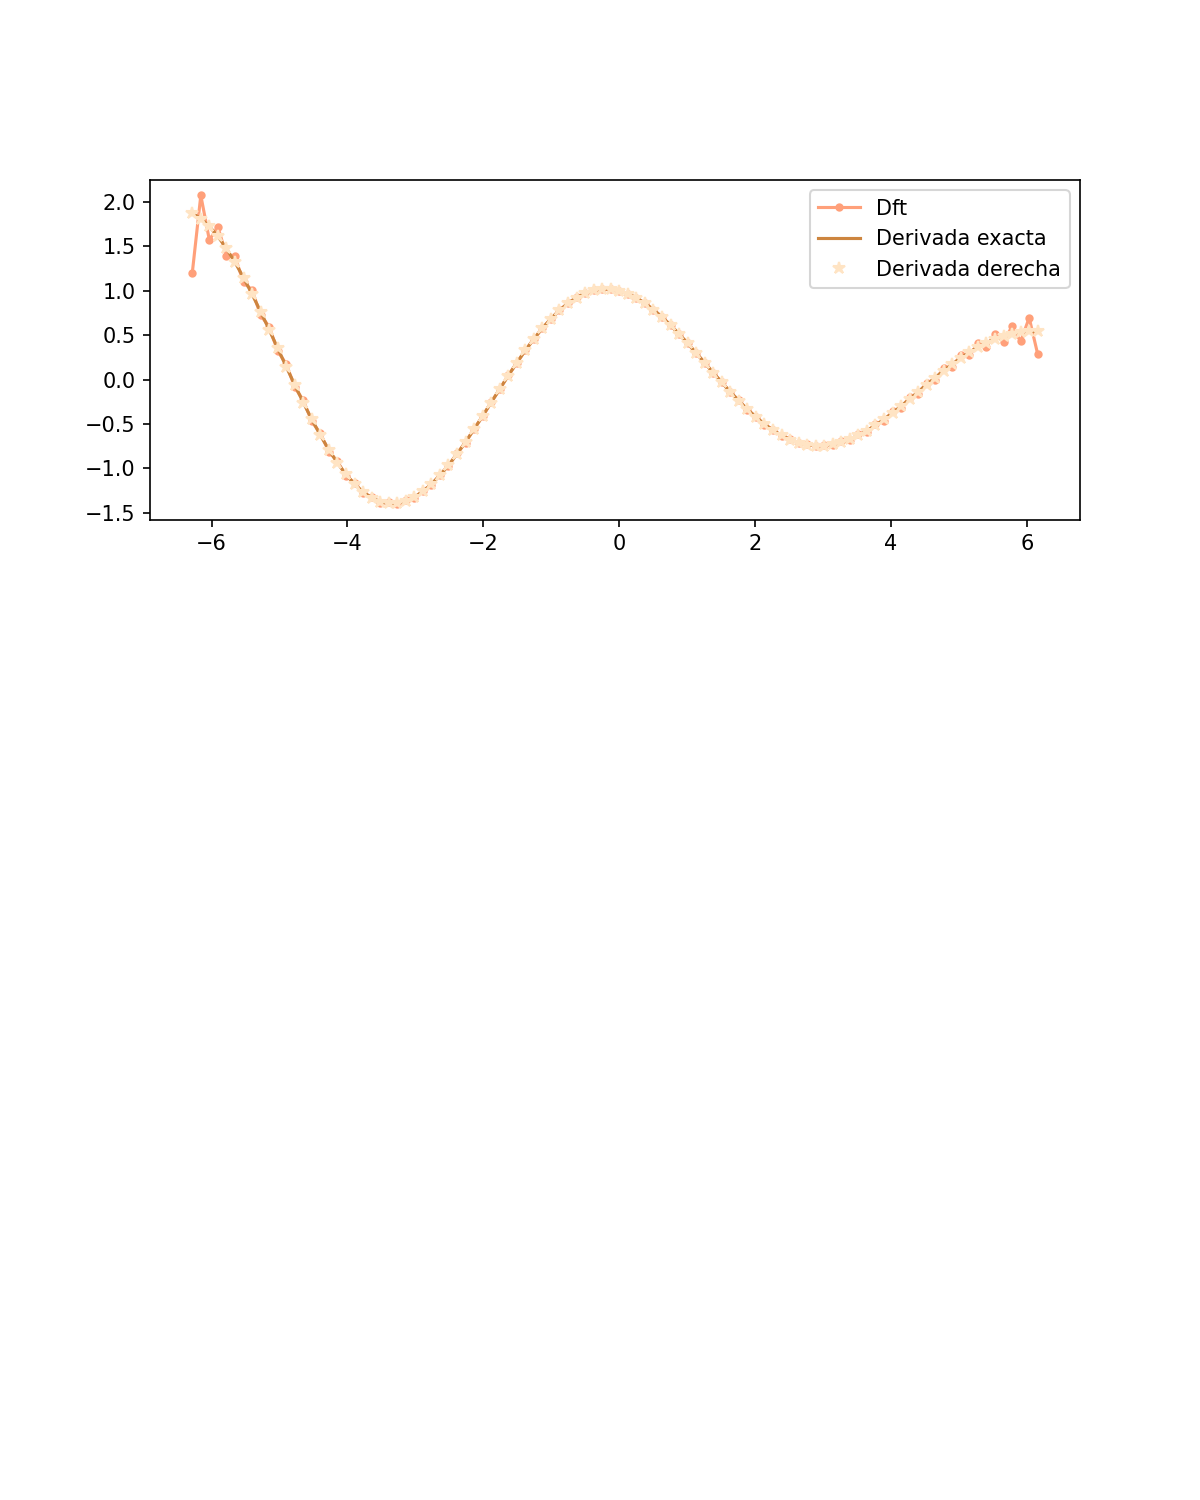

In [16]:
fig4 = plt.figure(figsize=(8,10))
ax4 = fig4.add_subplot(3,1,1)
ax4.plot(x4_, der_fft.real, ".-", color = "lightsalmon",  label='Dft')
ax4.plot(x4_, der_exacta, color = "peru", label = "Derivada exacta")
ax4.plot(x4_, der_der, "*", color = "bisque", label = "Derivada derecha" )
plt.legend(loc=1)

# Punto 5

In [17]:
file = 'data.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'

if not path.exists(file):
    Path_ = wget.download(url, file)
    print('descargado')
else:
    Path_ = file

In [18]:
#Aquí se extrae la información del file

data = np.loadtxt(file)
data = data[data[:,0]>=1900]
años = data[:,0]
mes = data[:,1]
n_manchas = np.array(data[:,3])

<IPython.core.display.Javascript object>


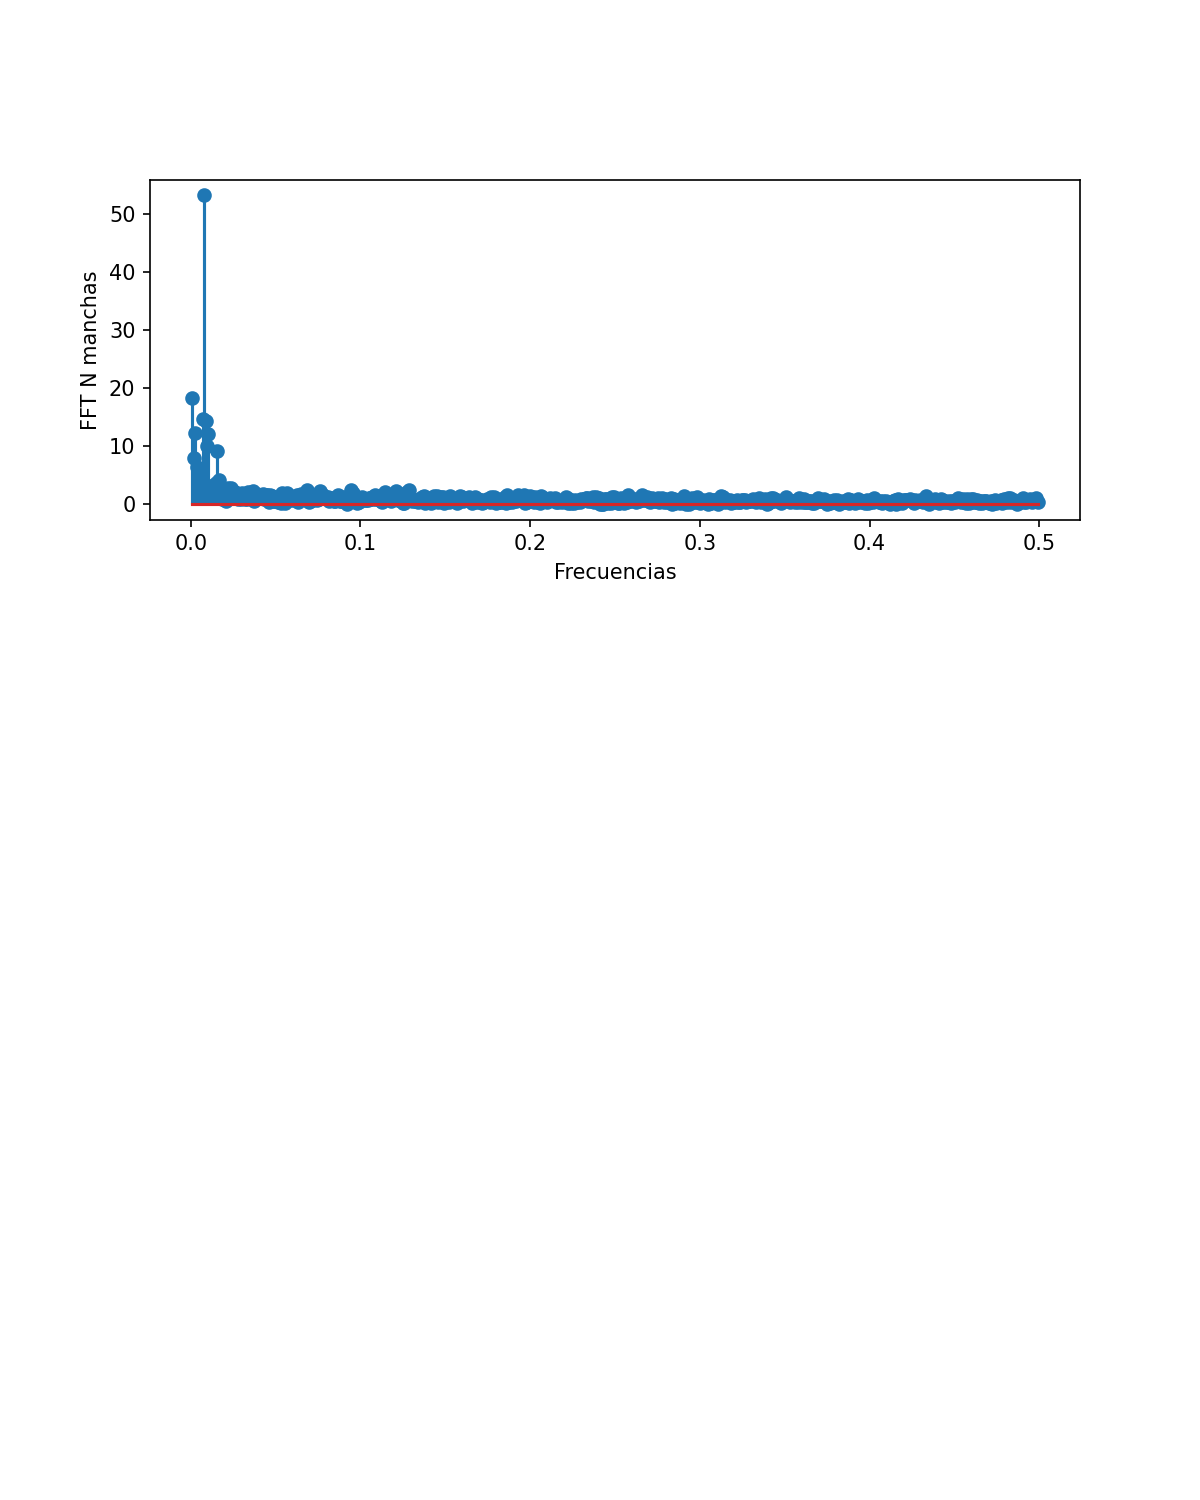

Text(0, 0.5, 'FFT N manchas')

In [19]:
#Transformada de Fourier

#Quitando el valor promedio
nmanchas = n_manchas - np.mean(n_manchas)
fftnmanchas = np.fft.fft(nmanchas)

N = len(fftnmanchas)

frecuencias = np.fft.fftfreq(N)
fftnmanchasn = np.abs(fftnmanchas)/N

#Aplicando nyquist 
fnmanchas = 2*(fftnmanchasn[frecuencias>0])
frec = frecuencias[frecuencias>0]

#Frecuencia dominante por año 
fdom = frec[np.argmax(fnmanchas)]
periodo = 1/(12*fdom)

#Transformada de Fourier

#Quitando el valor promedio
nmanchas = n_manchas - np.mean(n_manchas)
fftnmanchas = np.fft.fft(nmanchas)

N = len(fftnmanchas)

frecuencias = np.fft.fftfreq(N)
fftnmanchasn = np.abs(fftnmanchas)/N

#Aplicando nyquist 
fnmanchas = 2*(fftnmanchasn[frecuencias>0])
frec = frecuencias[frecuencias>0]

#Frecuencia dominante por año 
fdom = frec[np.argmax(fnmanchas)]
periodo = 1/(12*fdom)

fig5 = plt.figure(figsize=(8,10))
ax5 = fig5.add_subplot(3,1,1)
ax5.stem(frec, fnmanchas, use_line_collection = True)
ax5.set_xlabel("Frecuencias")
ax5.set_ylabel("FFT N manchas")

<IPython.core.display.Javascript object>


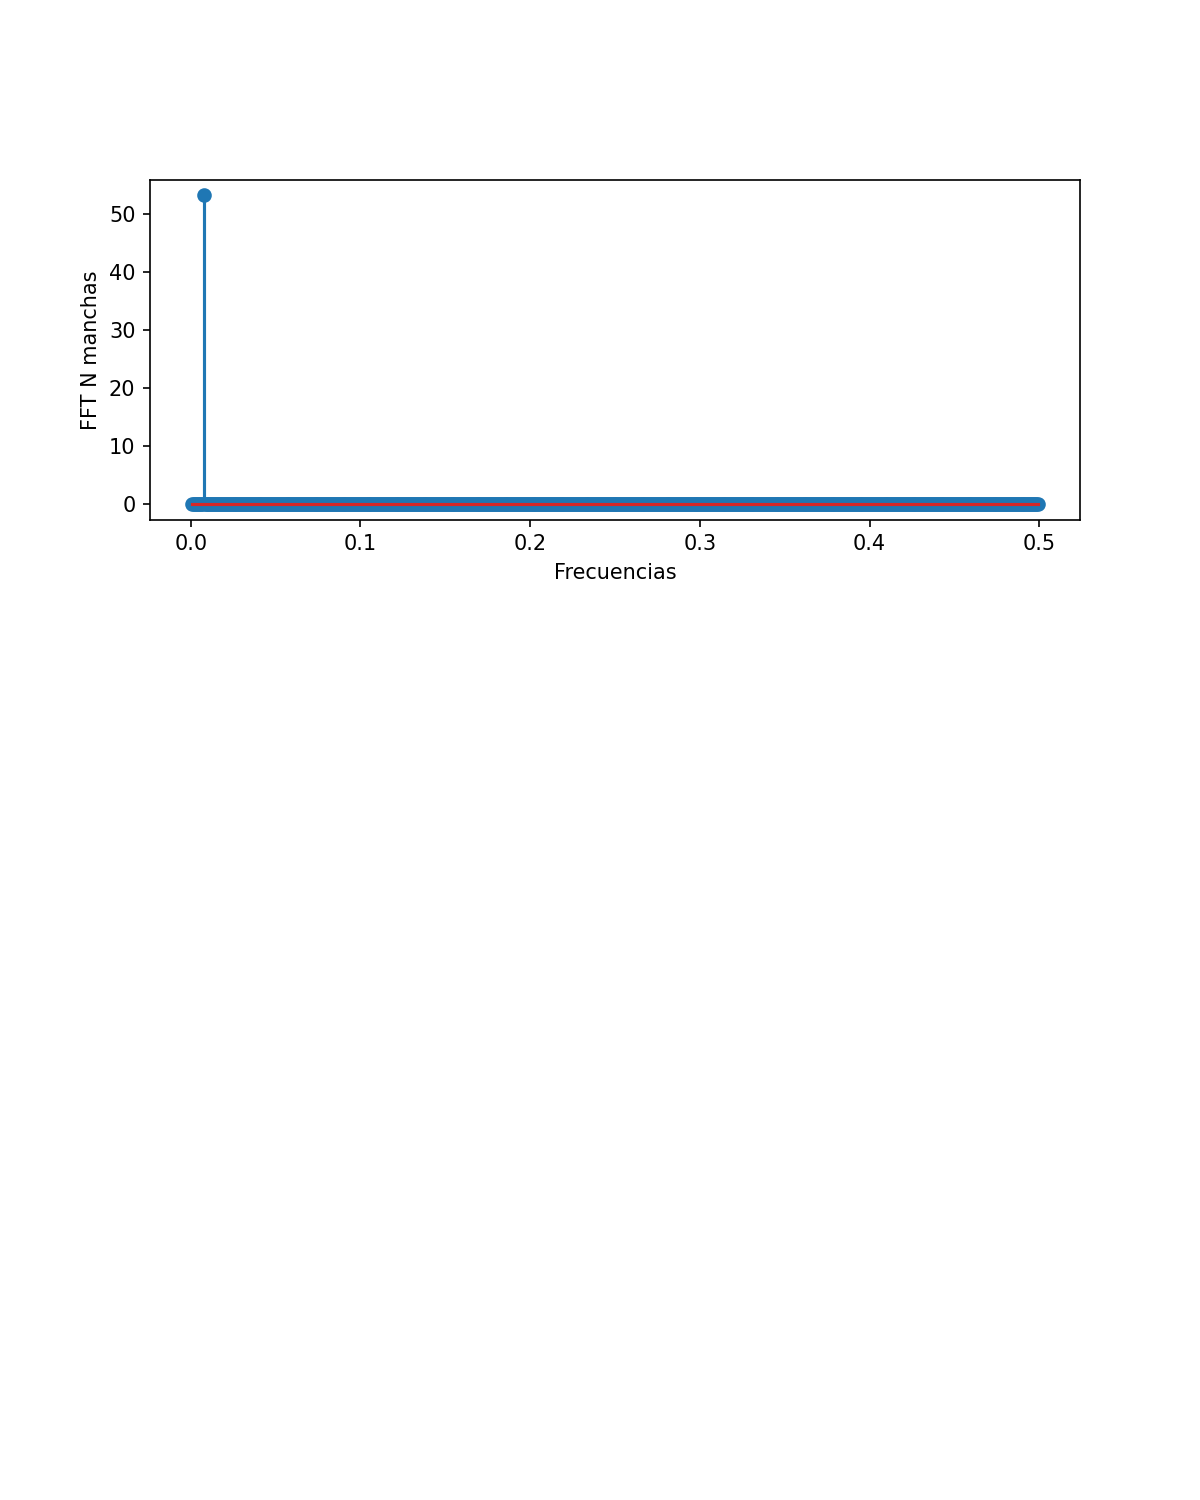

Text(0, 0.5, 'FFT N manchas')

In [20]:
#Ahora le quitamos los datos que no tienen la frecuencia dominante
newnmanchas = fnmanchas
newnmanchas[frec!=fdom] = 0

fig52 = plt.figure(figsize=(8,10))
ax52 = fig52.add_subplot(3,1,1)
ax52.stem(frec, newnmanchas, use_line_collection = True)
ax52.set_xlabel("Frecuencias")
ax52.set_ylabel("FFT N manchas")

<IPython.core.display.Javascript object>


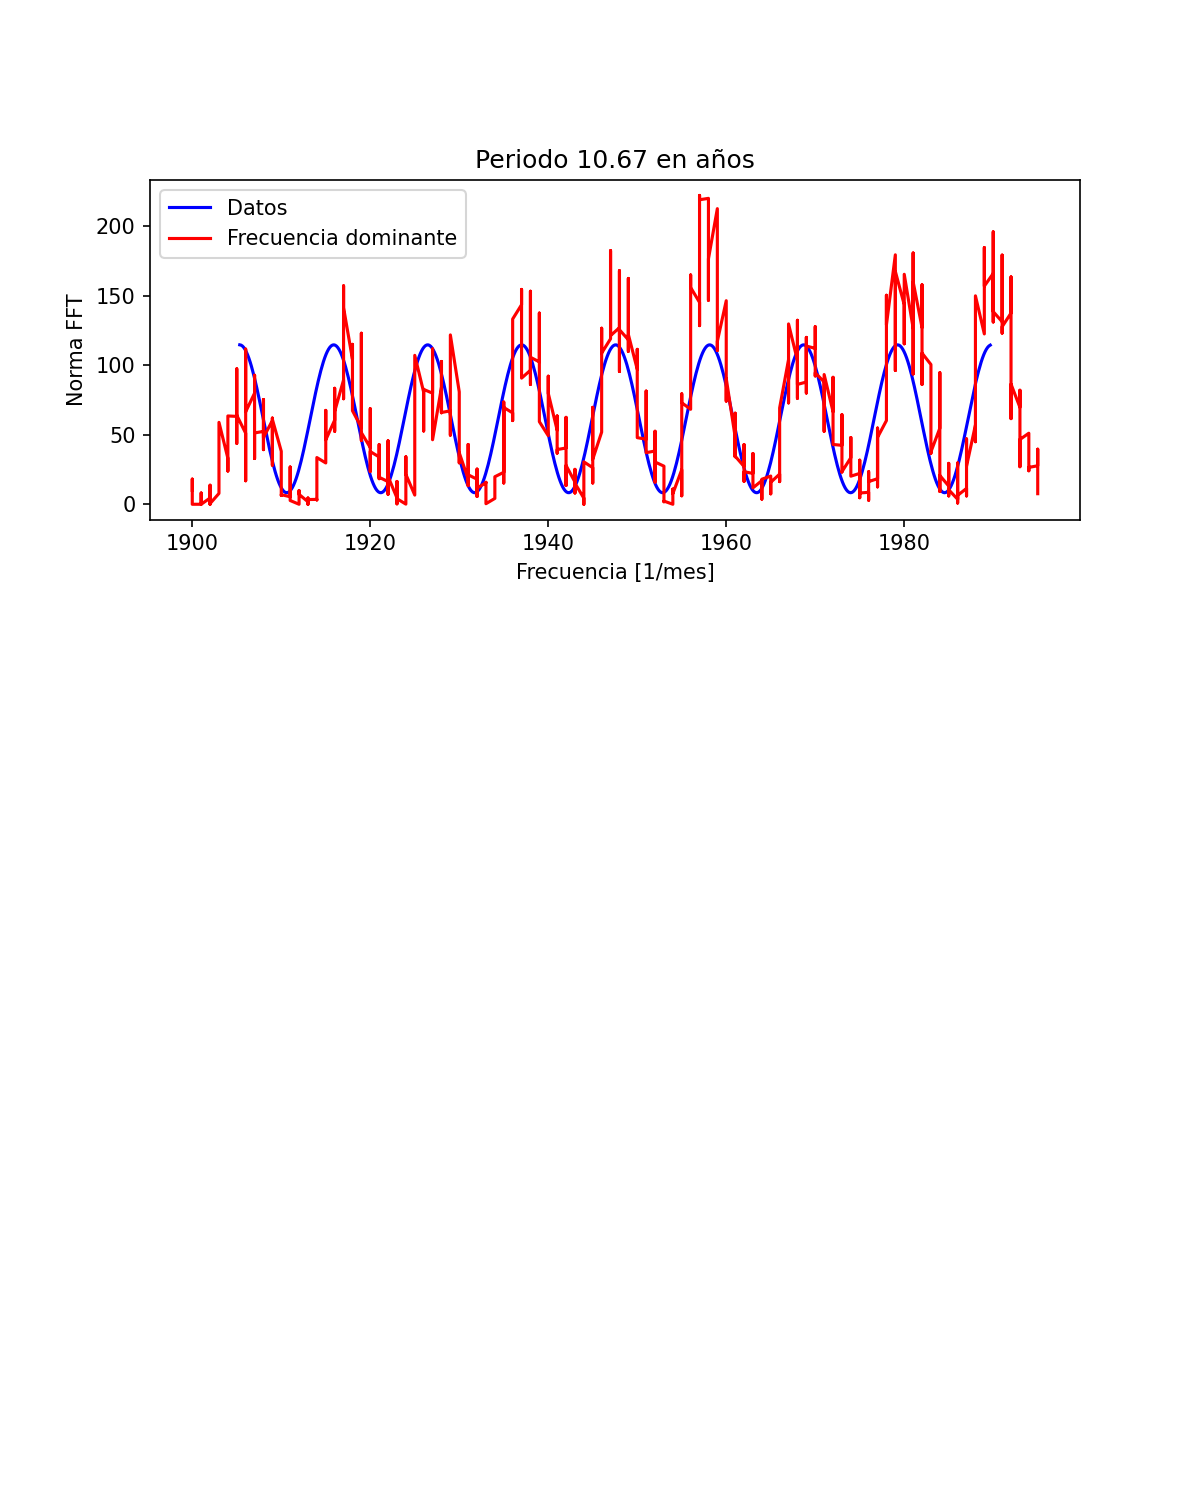

In [21]:
#Ahora hacemos la gráfica

tiempo = np.linspace(np.min(años) + (periodo/2), np.max(años) - (periodo/2), len(newnmanchas))
inversanmanchas = np.fft.ifft(newnmanchas)

fig53 = plt.figure(figsize=(8,10))
ax53 = fig53.add_subplot(3,1,1)
ax53.plot(tiempo, ((inversanmanchas.real)*len(inversanmanchas)) + np.mean(n_manchas), color = "blue", label = "Datos")
ax53.plot(años, n_manchas, color = "red", label = "Frecuencia dominante")
ax53.set_xlabel("Frecuencia [1/mes]")
ax53.set_ylabel("Norma FFT")
ax53.set_title("Periodo {:.2f} en años".format(periodo))
plt.legend()